<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

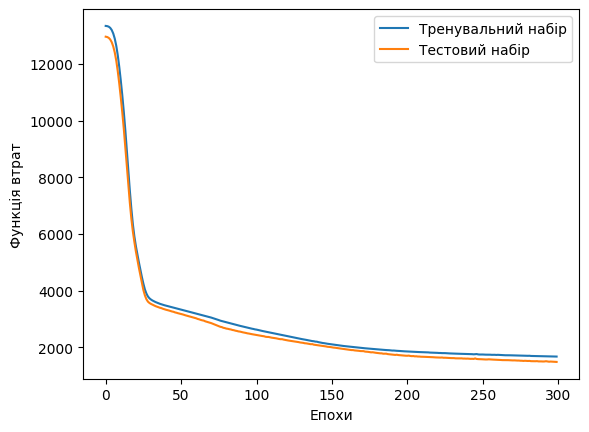

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Завантаження набору даних
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

# Перевірка структури та статистики даних
print(data.info())
print(data.describe())

# Підготовка даних
X = data.drop(columns=['charges'])  # Видалення цільової змінної
y = data['charges']

# Обробка категоріальних ознак (якщо вони є)
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['smoker'] = label_encoder.fit_transform(X['smoker'])
X['region'] = label_encoder.fit_transform(X['region'])

# Масштабування ознак
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі нейронної мережі
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Вхідний шар з кількістю вхідних ознак
    layers.Dense(128, activation='relu'),  # Повнозв'язний шар з 128 нейронами та функцією активації ReLU
    layers.Dense(64, activation='relu'),  # Додатковий повнозв'язний шар з 64 нейронами
    layers.Dense(1)  # Вихідний шар з одним нейроном (регресія)
])

# Компіляція моделі з функцією втрат MAE та оптимізатором 'adam'
model.compile(optimizer='adam', loss='mae')

# Тренування моделі зі 300 епохами
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=0)

# Оцінка результатів на тестовому наборі
loss = model.evaluate(X_test, y_test)
print(f'Середня абсолютна помилка на тестовому наборі: {loss:.2f}')

# Графік зміни функції втрат на тренувальному та тестувальному наборах під час тренування
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Тренувальний набір')
plt.plot(history.history['val_loss'], label='Тестовий набір')
plt.xlabel('Епохи')
plt.ylabel('Функція втрат')
plt.legend()
plt.show()

Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 322406144.0000 - val_loss: 323317728.0000
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 322156896.0000 - val_loss: 322806976.0000
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 321068096.0000 - val_loss: 320835840.0000
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 317440736.0000 - val_loss: 315230304.0000
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 308795104.0000 - val_loss: 302303744.0000
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 290962944.0000 - val_loss: 278164512.0000
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 259700848.0000 - val_loss: 239675552.0000
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 213981792.0000 - val_loss: 186497632.0000
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 1572399

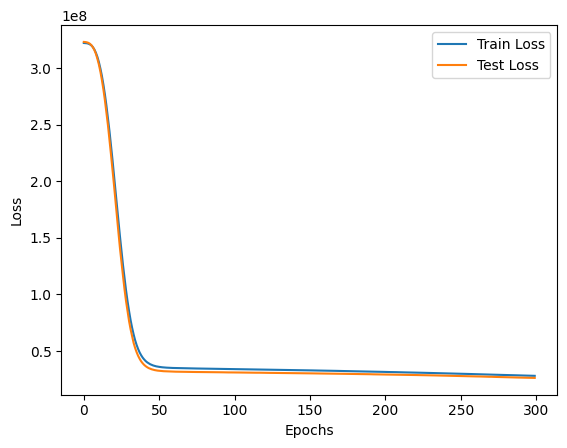

In [4]:
# Визначення input_shape
input_shape = X_train.shape[1]

# Модель 1
model1 = keras.Sequential()
model1.add(keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model1.add(keras.layers.Dense(32, activation='relu'))
model1.add(keras.layers.Dense(32, activation='relu'))
model1.add(keras.layers.Dense(1))
model1.compile(optimizer='adam', loss='mean_squared_error')
history1 = model1.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Модель 2
model2 = keras.Sequential()
model2.add(keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(1))
model2.compile(optimizer='adam', loss='mean_squared_error')
history2 = model2.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Модель 3
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model3 = keras.Sequential()
model3.add(keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model3.add(keras.layers.Dense(32, activation='relu'))
model3.add(keras.layers.Dense(1))
model3.compile(optimizer=custom_optimizer, loss='mean_squared_error')
history3 = model3.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Модель 4
model4 = keras.Sequential()
model4.add(keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model4.add(keras.layers.Dense(32, activation='relu'))
model4.add(keras.layers.Dense(1))
model4.compile(optimizer='adam', loss='mean_squared_error')
history4 = model4.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

# Графіки
plt.plot(history4.history['loss'], label='Train Loss')
plt.plot(history4.history['val_loss'], label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 322429824.0000 - val_loss: 323366752.0000
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 322298304.0000 - val_loss: 323096832.0000
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 321668768.0000 - val_loss: 321847648.0000
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 319290304.0000 - val_loss: 317734656.0000
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 312455648.0000 - val_loss: 307056928.0000
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 296973184.0000 - val_loss: 284826624.0000
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 268015840.0000 - val_loss: 248273424.0000
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 223539616.0000 - val_loss: 194626880.0000
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 1675190

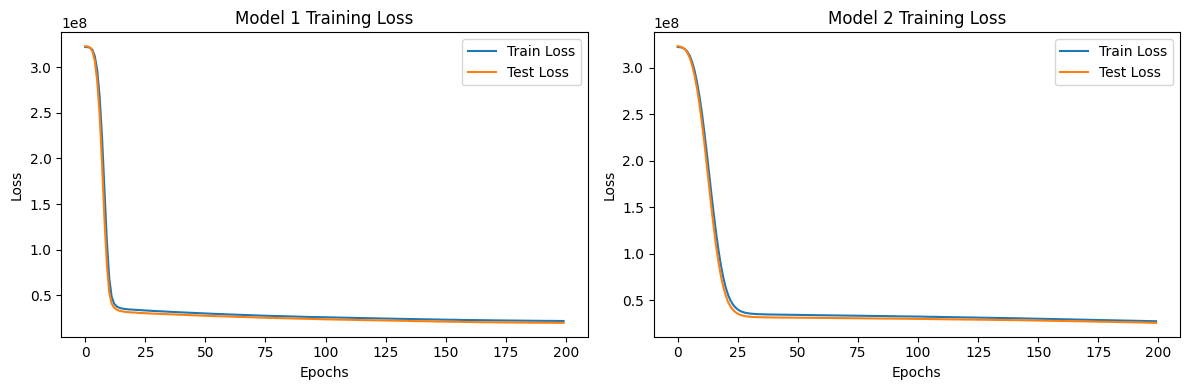

In [5]:
# Визначення input_shape
input_shape = X_train.shape[1]

# Модель 1
model1 = keras.Sequential()
model1.add(keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model1.add(keras.layers.Dense(32, activation='relu'))
model1.add(keras.layers.Dense(32, activation='relu'))
model1.add(keras.layers.Dense(1))
model1.compile(optimizer='adam', loss='mean_squared_error')
history1 = model1.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Графіки для моделі 1
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Test Loss')
plt.title('Model 1 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Модель 2
model2 = keras.Sequential()
model2.add(keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(1))
model2.compile(optimizer='adam', loss='mean_squared_error')
history2 = model2.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Графіки для моделі 2
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.title('Model 2 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/200
34/34 [==============================] - 1s 7ms/step - loss: 322430016.0000 - val_loss: 323377600.0000
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 322356128.0000 - val_loss: 323263520.0000
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 322176160.0000 - val_loss: 322998144.0000
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 321786464.0000 - val_loss: 322464288.0000
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 321068928.0000 - val_loss: 321515616.0000
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 319869664.0000 - val_loss: 320025696.0000
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 318030304.0000 - val_loss: 317779136.0000
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 315382240.0000 - val_loss: 314631712.0000
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 3118120

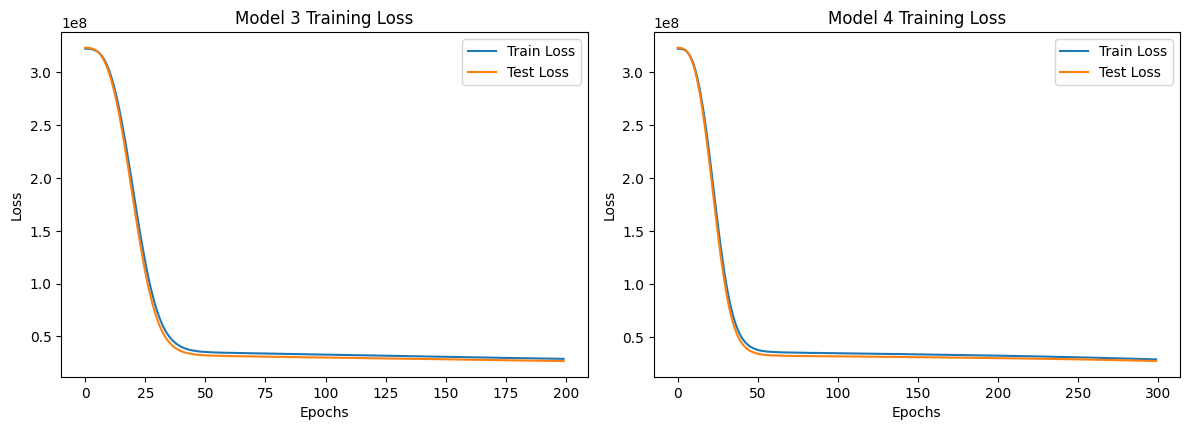

In [6]:
# Модель 3
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model3 = keras.Sequential()
model3.add(keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model3.add(keras.layers.Dense(32, activation='relu'))
model3.add(keras.layers.Dense(1))
model3.compile(optimizer=custom_optimizer, loss='mean_squared_error')
history3 = model3.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Графіки для моделі 3
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Test Loss')
plt.title('Model 3 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Модель 4
model4 = keras.Sequential()
model4.add(keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model4.add(keras.layers.Dense(32, activation='relu'))
model4.add(keras.layers.Dense(1))
model4.compile(optimizer='adam', loss='mean_squared_error')
history4 = model4.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

# Графіки для моделі 4
plt.subplot(2, 2, 2)
plt.plot(history4.history['loss'], label='Train Loss')
plt.plot(history4.history['val_loss'], label='Test Loss')
plt.title('Model 4 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# New section